# Dados

In [1]:
# read data from github

import pandas as pd

url1 = 'https://raw.githubusercontent.com/andrelmfsantos/enade/main/enade_data/enade_1of10.csv'
url2 = 'https://raw.githubusercontent.com/andrelmfsantos/enade/main/enade_data/enade_2of10.csv'
url3 = 'https://raw.githubusercontent.com/andrelmfsantos/enade/main/enade_data/enade_3of10.csv'
url4 = 'https://raw.githubusercontent.com/andrelmfsantos/enade/main/enade_data/enade_4of10.csv'
url5 = 'https://raw.githubusercontent.com/andrelmfsantos/enade/main/enade_data/enade_5of10.csv'
url6 = 'https://raw.githubusercontent.com/andrelmfsantos/enade/main/enade_data/enade_6of10.csv'
url7 = 'https://raw.githubusercontent.com/andrelmfsantos/enade/main/enade_data/enade_7of10.csv'
url8 = 'https://raw.githubusercontent.com/andrelmfsantos/enade/main/enade_data/enade_8of10.csv'
url9 = 'https://raw.githubusercontent.com/andrelmfsantos/enade/main/enade_data/enade_9of10.csv'
url10 = 'https://raw.githubusercontent.com/andrelmfsantos/enade/main/enade_data/enade_10of10.csv'

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)
df5 = pd.read_csv(url5)
df6 = pd.read_csv(url6)
df7 = pd.read_csv(url7)
df8 = pd.read_csv(url8)
df9 = pd.read_csv(url9)
df10 = pd.read_csv(url10)

# append dataframes
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])
print(len(df))

# subset where column NO_CINE_ROTULO contains "Química industrial e tecnológica" or "Química"
df_quimica = df[df['NO_CINE_ROTULO'].isin(['Química industrial e tecnológica', 'Química'])]
print(len(df_quimica))
# lista cursos de química
list_quimica = df_quimica.NO_CINE_ROTULO.unique()
list_quimica = [x.title() for x in list_quimica] # coloca todas primeiras letras em maiúscula
print(list_quimica)
df_quimica.sample(3, random_state = 43)

<ipython-input-1-76dcbda661d1>:16: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(url1)
<ipython-input-1-76dcbda661d1>:22: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df7 = pd.read_csv(url7)
<ipython-input-1-76dcbda661d1>:23: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df8 = pd.read_csv(url8)


906133
14962
['Química', 'Química Industrial E Tecnológica']


,ano,NO_CINE_AREA_ESPECIFICA,NO_CINE_ROTULO,modalidade,regiao,sexo,cor_pele,idade,renda_familiar,sit_financeira,sit_trabalho,acao_afirmativa,livros_lidos_ano,nota_geral,nt_formacao_geral,nt_comp_esp
39000,2011,Ciências físicas,Química,Presencial,Sudeste,Feminino,Amarelo/Oriental,27,"De 1,5 a 3 SM",Não tenho renda e meus gastos são financiados ...,Trabalhei entre 20 e 40 horas semanais,Não usei,Entre três e cinco,20.5,7.5,24.8
41656,2005,Ciências físicas,Química industrial e tecnológica,NaN,Sudeste,Feminino,NaN,29,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
44203,2011,Ciências físicas,Química,Presencial,Sudeste,Masculino,Branco,30,De 3 a 6 SM,Sou o principal responsável pelo sustento da f...,Trabalhei eventualmente,Não usei,Nenhum,39.7,59.5,33.1


# Tabelas e Gráficos


In [2]:
# @title Tabela 1 $-$ Proporção de alunos de Química por Cor da Pele
dc = df_quimica.copy()
dc['NO_CINE_ROTULO'] = dc.NO_CINE_ROTULO.str.lower()
dc = dc[dc['NO_CINE_ROTULO'].str.contains('química')]
dc = dc[~dc['NO_CINE_ROTULO'].str.contains('bio')]

raca = dc.groupby(['cor_pele']).size().reset_index()
raca.columns = ['cor_pele','n']
raca['%'] = raca.n/sum(raca.n)*100
print(dc.cor_pele.unique())
raca.sort_values(by = ['%'], ascending = False).round(2)

[nan 'Branco' 'Pardo' 'Negro' 'Indígena' 'Amarelo/Oriental'
 'Não quero declarar']


,cor_pele,n,%
1,Branco,8365,67.66
5,Pardo,2815,22.77
3,Negro,738,5.97
0,Amarelo/Oriental,288,2.33
4,Não quero declarar,102,0.82
2,Indígena,56,0.45


In [3]:
# @title Tabela 2 $-$ Proporção de alunos de Química apenas com Cor da Pele Declarada
dr = dc.dropna(subset=['cor_pele'])
dr = dr[dr.cor_pele != "Não quero declarar"]
raca = dr.groupby(['cor_pele']).size().reset_index()
raca.columns = ['cor_pele','n']
raca['%'] = raca.n/sum(raca.n)*100
raca.sort_values(by = ['%'], ascending = False).round(2)

,cor_pele,n,%
1,Branco,8365,68.22
4,Pardo,2815,22.96
3,Negro,738,6.02
0,Amarelo/Oriental,288,2.35
2,Indígena,56,0.46


In [4]:
# @title Tabela 3 $-$ Alunos de Química com Ação Afirmativa por Cor da Pele Declarada e Ano
# Subset alunos de química
dq = df_quimica.copy()
"""
dq['NO_CINE_ROTULO'] = dq.NO_CINE_ROTULO.str.lower()
dq = dq[dq['NO_CINE_ROTULO'].str.contains('química')]
dq = dq[~dq['NO_CINE_ROTULO'].str.contains('bio')]
print(dq.NO_CINE_ROTULO.unique())
print(len(dq))
"""
# Subset alunos com algum critério da ação afirmativa
da = dq[dq.acao_afirmativa != "Não usei"]
print(len(da))
# Groupby Cor Declarada
dr = da.groupby(['ano','cor_pele']).size().reset_index() #'NO_CINE_ROTULO'
dr.columns = ['ano','cor_pele', 'alunos']
#dr = dr.pivot(index = 'ano', columns ='renda_familiar', values = 'alunos').fillna(0).reset_index(drop = False)
dr

7936


,ano,cor_pele,alunos
0,2005,Amarelo/Oriental,27
1,2005,Branco,763
2,2005,Indígena,7
3,2005,Negro,58
4,2005,Pardo,247
5,2008,Amarelo/Oriental,61
6,2008,Branco,1780
7,2008,Indígena,18
8,2008,Negro,127
9,2008,Pardo,562


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

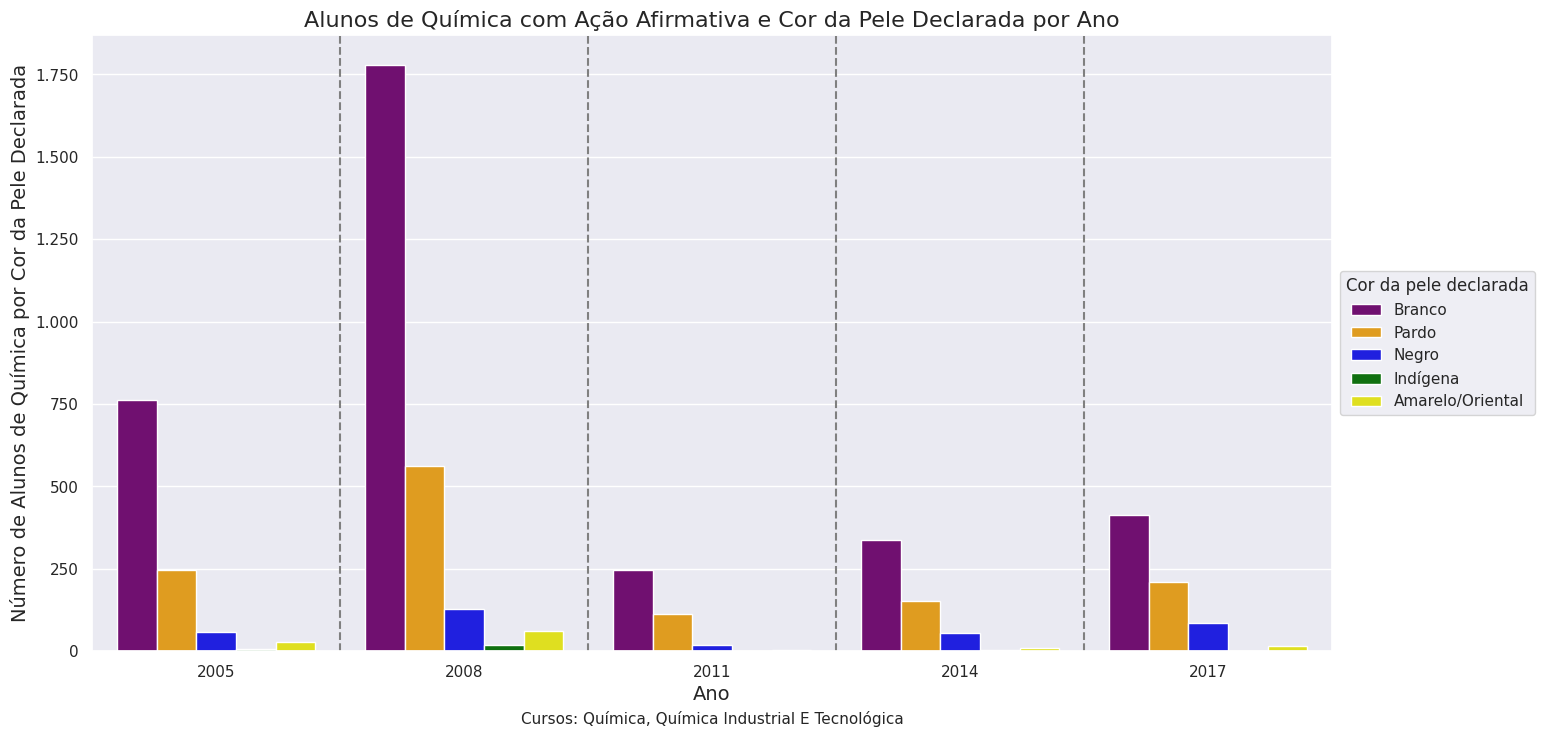

In [5]:
# @title Gráfico 1 $-$ Alunos com Ação Afirmativa por Cor da Pele Declarada e Ano
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from google.colab import files

# Set the seaborn style to whitegrid to mimic ggplot style
sns.set_theme(style="darkgrid")

# Set the figure size (width, height in inches)
plt.figure(figsize=(16, 8))

# Define a custom palette for the categories
custom_palette = {'Branco':'purple',
                  'Pardo':'orange',
                  'Negro':'blue',
                  'Indígena':'green',
                  'Amarelo/Oriental':'yellow'
                  }

# Specify the order for the main categories (Years) and sub-categories (Category)
year_order = sorted(dr['ano'].unique(), reverse=False)  # Sort years in ascending order
category_order = ['Branco','Pardo','Negro','Indígena','Amarelo/Oriental']  # Change the order of categories

# Create a bar plot
sns.barplot(x='ano', y='alunos', hue='cor_pele', data=dr, palette=custom_palette,
            order=year_order, hue_order=category_order)

# Adding vertical lines to split each year
# Calculate positions of vertical lines after plotting
years = dr['ano'].unique()
for i, year in enumerate(years[:-1]):  # Skip the last one as it doesn't need a line after it
    plt.axvline(x=i+0.5, color='grey', linestyle='--')

# Place the legend on the left side
plt.legend(title='Cor da pele declarada', loc='center left', bbox_to_anchor=(1, 0.5))

# Add a title to the plot
plt.title('Alunos de Química com Ação Afirmativa e Cor da Pele Declarada por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Alunos de Química por Cor da Pele Declarada', fontsize=14)

# Formatter function to add thousands separator (US)
#def thousands_separator(x, pos):
#    return f'{x:,.0f}'

# Formatter function to add thousands separator (Europe)
def thousands_separator(x, pos):
    formatted = f'{x:,.0f}'
    return formatted.replace(',', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_separator))

# Footnote from a list
footnote_items = list_quimica #data[data['NO_CINE_ROTULO'].str.contains('química')]['NO_CINE_ROTULO'].unique()
footnote_text = 'Cursos: ' + ', '.join(footnote_items)  # Join items into a single string

# Add the footnote
plt.text(0.5, -0.11, footnote_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=11)

# Save the plot as a SVG file
plt.savefig('cor_pele_plot.svg', format='svg')
# Download the file to your local computer
files.download('cor_pele_plot.svg')

# Display the plot
plt.show()

In [6]:
# @title Tabela 4 $-$ Alunos de Química com Ação Afirmativa por Sexo e Ano
#Subset alunos de química
dq = df_quimica.copy()
"""
dq['NO_CINE_ROTULO'] = dq.NO_CINE_ROTULO.str.lower()
dq = dq[dq['NO_CINE_ROTULO'].str.contains('química')]
dq = dq[~dq['NO_CINE_ROTULO'].str.contains('bio')]
print(dq.NO_CINE_ROTULO.unique())
print(len(dq))
"""
# Subset alunos com algum critério da ação afirmativa
da = dq[dq.acao_afirmativa != "Não usei"]
print(len(da))
# Groupby Sexo
ds = da.groupby(['ano','sexo']).size().reset_index() #'NO_CINE_ROTULO'
ds.columns = ['ano','sexo', 'alunos']
#ds = ds.pivot(index = 'ano', columns ='renda_familiar', values = 'alunos').fillna(0).reset_index(drop = False)
ds

7936


,ano,sexo,alunos
0,2005,Feminino,740
1,2005,Masculino,821
2,2008,Feminino,1784
3,2008,Masculino,1718
4,2011,Feminino,368
5,2011,Masculino,380
6,2014,Feminino,523
7,2014,Masculino,436
8,2017,Feminino,667
9,2017,Masculino,499


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

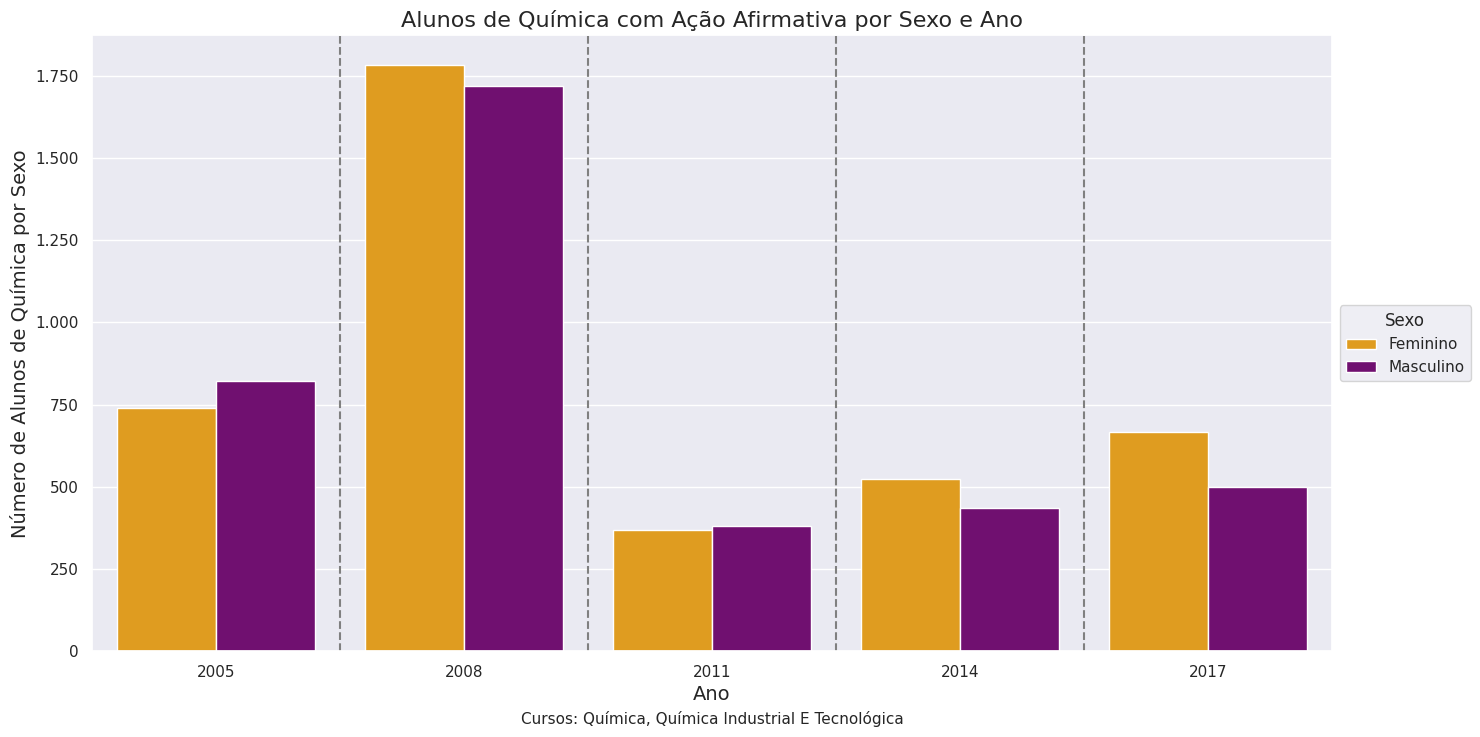

In [7]:
# @title Gráfico 2 $-$ Alunos com Ação Afirmativa por Sexo e Ano
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from google.colab import files

# Set the seaborn style to whitegrid to mimic ggplot style
sns.set_theme(style="darkgrid")

# Set the figure size (width, height in inches)
plt.figure(figsize=(16, 8))

# Define a custom palette for the categories
custom_palette = {'Masculino':'purple',
                  'Feminino':'orange'
                  }

# Specify the order for the main categories (Years) and sub-categories (Category)
year_order = sorted(ds['ano'].unique(), reverse=False)  # Sort years in ascending order
category_order = ['Feminino','Masculino']  # Change the order of categories

# Create a bar plot
sns.barplot(x='ano', y='alunos', hue='sexo', data=ds, palette=custom_palette,
            order=year_order, hue_order=category_order)

# Adding vertical lines to split each year
# Calculate positions of vertical lines after plotting
years = ds['ano'].unique()
for i, year in enumerate(years[:-1]):  # Skip the last one as it doesn't need a line after it
    plt.axvline(x=i+0.5, color='grey', linestyle='--')

# Place the legend on the left side
plt.legend(title='Sexo', loc='center left', bbox_to_anchor=(1, 0.5))

# Add a title to the plot
plt.title('Alunos de Química com Ação Afirmativa por Sexo e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Alunos de Química por Sexo', fontsize=14)

# Formatter function to add thousands separator (US)
#def thousands_separator(x, pos):
#    return f'{x:,.0f}'

# Formatter function to add thousands separator (Europe)
def thousands_separator(x, pos):
    formatted = f'{x:,.0f}'
    return formatted.replace(',', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_separator))

# Footnote from a list
footnote_items = list_quimica #data[data['NO_CINE_ROTULO'].str.contains('química')]['NO_CINE_ROTULO'].unique()
footnote_text = 'Cursos: ' + ', '.join(footnote_items)  # Join items into a single string

# Add the footnote
plt.text(0.5, -0.11, footnote_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=11)

# Save the plot as a SVG file
plt.savefig('sexo_plot.svg', format='svg')
# Download the file to your local computer
files.download('sexo_plot.svg')

# Display the plot
plt.show()

In [8]:
# @title Tabela 5 $-$ Alunos de Química com Ação Afirmativa por Renda Familiar e Ano
#Subset alunos de química
dq = df_quimica.copy()
"""
dq['NO_CINE_ROTULO'] = dq.NO_CINE_ROTULO.str.lower()
dq = dq[dq['NO_CINE_ROTULO'].str.contains('química')]
dq = dq[~dq['NO_CINE_ROTULO'].str.contains('bio')]
print(dq.NO_CINE_ROTULO.unique())
print(len(dq))
"""
# Subset alunos com algum critério da ação afirmativa
da = dq[dq.acao_afirmativa != "Não usei"]
print(len(da))
# Groupby Renda Familiar
drf = da.groupby(['ano','renda_familiar']).size().reset_index() #'NO_CINE_ROTULO'
drf.columns = ['ano','renda_familiar', 'alunos']
#drf = drf.pivot(index = 'ano', columns ='renda_familiar', values = 'alunos').fillna(0).reset_index(drop = False)
drf#.sample(5, random_state = 5)

7936


,ano,renda_familiar,alunos
0,2005,Até 3 SM,232
1,2005,De 10 a 30 SM,193
2,2005,De 3 a 10 SM,664
3,2005,Mais de 30 SM,12
4,2008,Até 3 SM,853
5,2008,De 10 a 30 SM,314
6,2008,De 3 a 10 SM,1342
7,2008,Mais de 30 SM,26
8,2011,"Até 1,5 SM",37
9,2011,"De 1,5 a 3 SM",76


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

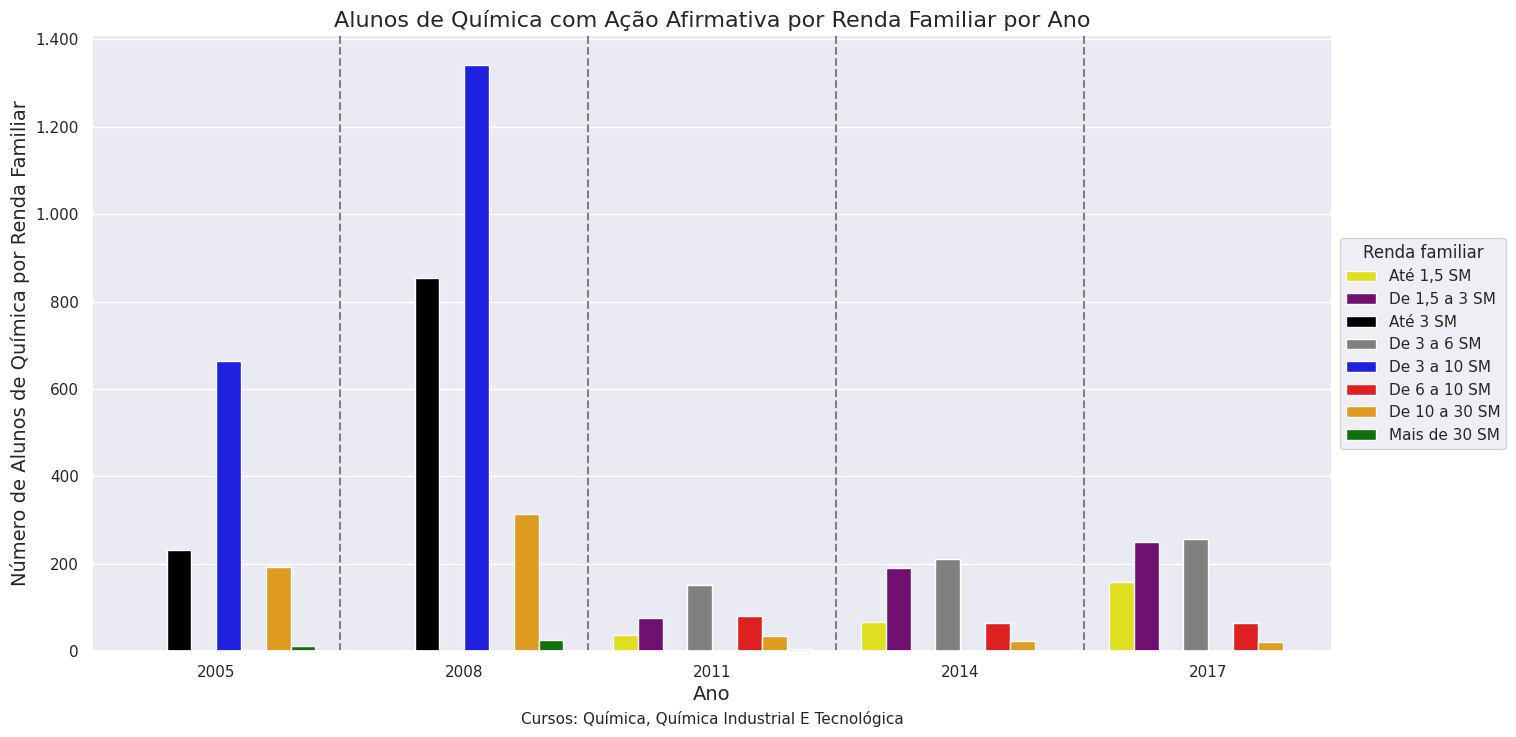

In [9]:
# @title Gráfico 3 $-$ Alunos de Química com Ação Afirmativa por Renda Familiar e Ano
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from google.colab import files

# Set the seaborn style to whitegrid to mimic ggplot style
sns.set_theme(style="darkgrid")

# Set the figure size (width, height in inches)
plt.figure(figsize=(16, 8))

# Define a custom palette for the categories
custom_palette = {'Até 3 SM':'black',
                  'De 10 a 30 SM':'orange',
                  'De 3 a 10 SM':'blue',
                  'Mais de 30 SM':'green',
                  'Até 1,5 SM':'yellow',
                  'De 1,5 a 3 SM':'purple',
                  'De 3 a 6 SM':'gray',
                  'De 6 a 10 SM':'red'}


# Specify the order for the main categories (Years) and sub-categories (Category)
year_order = sorted(drf['ano'].unique(), reverse=False)  # Sort years in ascending order
category_order = ['Até 1,5 SM','De 1,5 a 3 SM','Até 3 SM','De 3 a 6 SM','De 3 a 10 SM','De 6 a 10 SM','De 10 a 30 SM','Mais de 30 SM']  # Change the order of categories

# Create a bar plot
sns.barplot(x='ano', y='alunos', hue='renda_familiar', data=drf, palette=custom_palette,
            order=year_order, hue_order=category_order)

# Adding vertical lines to split each year
# Calculate positions of vertical lines after plotting
years = drf['ano'].unique()
for i, year in enumerate(years[:-1]):  # Skip the last one as it doesn't need a line after it
    plt.axvline(x=i+0.5, color='grey', linestyle='--')

# Place the legend on the left side
plt.legend(title='Renda familiar', loc='center left', bbox_to_anchor=(1, 0.5))

# Add a title to the plot
plt.title('Alunos de Química com Ação Afirmativa por Renda Familiar por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Alunos de Química por Renda Familiar', fontsize=14)

# Formatter function to add thousands separator (US)
#def thousands_separator(x, pos):
#    return f'{x:,.0f}'

# Formatter function to add thousands separator (Europe)
def thousands_separator(x, pos):
    formatted = f'{x:,.0f}'
    return formatted.replace(',', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_separator))

# Footnote from a list
footnote_items = list_quimica #data[data['NO_CINE_ROTULO'].str.contains('química')]['NO_CINE_ROTULO'].unique()
footnote_text = 'Cursos: ' + ', '.join(footnote_items)  # Join items into a single string

# Add the footnote
plt.text(0.5, -0.11, footnote_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=11)

# Save the plot as a SVG file
plt.savefig('renda_familiar_plot.svg', format='svg')
# Download the file to your local computer
files.download('renda_familiar_plot.svg')

# Display the plot
plt.show()